In [1]:
import _thread
import time
import os
import matplotlib.pyplot as plt

VMs =[]

paidCounter = 0
hybridCounter = 0
freeCounter = 0
counter = 0
counters = []
times = []
counters.append(0)

#waitingRequest = []

for i in range(3):
    VMs.append(5)
    
def loadBalancer(userType):
    global paidCounter
    global hybridCounter
    global freeCounter
    global counter
    
    if userType == "paid":
        vm = VMs[0]
        VMs[0],paidCounter = checkPaidAutoScaling(VMs[0],paidCounter)
        if vm != VMs[0]: print("AutoScale for paid\n")
        print("allocated to paid\n")
        counter = counter + 1
        times.append(time.time())
        counters.append(counter)
        paidCounter = paidCounter - 1
        print("disallocated from paid\n")
        counter = counter -1
        counters.append(counter)
        times.append(time.time())
    elif userType == "hybrid":
        vm = VMs[1]
        VMs[1],hybridCounter = checkHybridAutoScaling(VMs[1], hybridCounter)
        if vm != VMs[0]: print("hybrid autoscale\n")
        print("allocated to hybrid\n")
        counter = counter + 1
        counters.append(counter)
        times.append(time.time())
        hybridCounter = hybridCounter - 1
        print("disallocated from paid\n")
        counter = counter - 1
        counters.append(counter)
        times.append(time.time())
    else:
        if freeCounter != VMs[2]:
            freeCounter = freeCounter+1
            print("allocated to free\n")
            counter = counter + 1
            counters.append(counter)
            times.append(time.time())
            freeCounter = freeCounter - 1
            counter = counter -1
            counters.append(counter)
            times.append(time.time())
            print("disallocated from free\n")
        else:
            print("can not be allocated/autoscaled to free\n")
            #waitingRequest.append("loadBalancer("+userType+","+time+")")       

In [2]:
def checkPaidAutoScaling(vm,counter):
    if (counter/vm)*100 > 50:
        vm = vm + 1
    counter = counter + 1
    return vm,counter

def checkHybridAutoScaling(vm,counter):
    if (counter/vm)*100 > 50:
        vm = vm + 1
        
    counter = counter + 1
    return vm,counter

In [5]:
def paidRequest(typeUser):
    for i in range(500):
        _thread.start_new_thread(loadBalancer,('paid',))
def hybridRequest(typeUser):
    for i in range(300):
        _thread.start_new_thread(loadBalancer,('hybrid',))
def freeRequest(typeUser):
    for i in range(200):
        _thread.start_new_thread(loadBalancer,('free',))
        

    
    
_thread.start_new_thread(paidRequest,('paid',))
_thread.start_new_thread(hybridRequest,('hybrid',))
_thread.start_new_thread(freeRequest,('free',))

allocated to free
allocated to free

disallocated from free

allocated to free

disallocated from free

allocated to free

disallocated from free

allocated to free
allocated to free

disallocated from free

allocated to free

disallocated from free

allocated to free

disallocated from free

allocated to free

disallocated from free

allocated to free

disallocated from free

allocated to free

disallocated from free

allocated to free
allocated to free

disallocated from free

allocated to free
allocated to free


can not be allocated/autoscaled to free

can not be allocated/autoscaled to free

can not be allocated/autoscaled to free
can not be allocated/autoscaled to free


can not be allocated/autoscaled to free

can not be allocated/autoscaled to free
disallocated from free
disallocated from free


4268

allocated to free

disallocated from free

allocated to free

disallocated from free

allocated to free
allocated to free

disallocated from free

disallocated from free
allocated to free

disallocated from free

allocated to free

disallocated from free

allocated to free

allocated to free

disallocated from free

allocated to free

disallocated from free



allocated to free

can not be allocated/autoscaled to free

can not be allocated/autoscaled to free

can not be allocated/autoscaled to free
can not be allocated/autoscaled to free

can not be allocated/autoscaled to free

can not be allocated/autoscaled to free

can not be allocated/autoscaled to free


can not be allocated/autoscaled to free

disallocated from free



allocated to free
can not be allocated/autoscaled to free

can not be allocated/autoscaled to free

can not be allocated/autoscaled to free
hybrid autoscale

allocated to hybrid

disallocated from paid



hybrid autoscale

allocated to hybrid

disallocated from pa

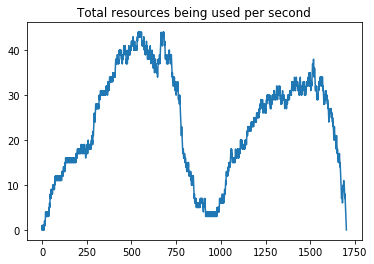

In [4]:
plt.figure(1)
plt.title("Total resources being used per second")
plt.plot(counters)
plt.show()